# Klasyfikacja raka mózgu - Hubert Jaremko

## Proces przetwarzania danych

### Opis zestawu danych
Cheng, Jun (2017): brain tumor dataset. figshare. Dataset. https://doi.org/10.6084/m9.figshare.1512427.v5 

Zestaw danych zawiera 3064 obrazów z przewagą T1 pochodzących od 233 pacientów z trzema rodzajami nowotworów mózgu:
 - oponiak (*meningioma*, 708 obrazów), 
 - glejak (*glioma*, 1426 obrazów),
 - nowotwór przysadki (*pituitary tumor*, 930 obrazów).

Dane zostały zorganizowe w formacie matlaba (pliki `.mat`).
Każdy plik przechowuje strukture danych składającą się z następujących pól:
 - `cjdata.label`: `1` oznaczający oponiaka, `2` gelajka, `3` guz przysadki
 - `cjdata.PID`: ID pacjenta
 - `cjdata.image`: dane obrazu
 - `cjdata.tumorBorder`: wektor zawierajacy koordynaty punktów na granicy guza.
 - `cjdata.tumorMask`: obraz binarny, w którym jedynki oznaczają region guza

### Wczytanie obrazów

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
cancer_type = {1 : 'Oponiak', 2 : 'Glejak', 3 : 'Guz przysadki'}

In [3]:
def from_raw_pid(raw_pid):
    return ''.join([chr(c[0]) for c in raw_pid])

def from_raw_label(raw_label):
    return int(raw_label[0][0])

def from_raw(raw):
    return raw[0][0]

def from_raw_image(raw_image):
    return np.asarray(raw_image)

def read_raw_brain_data(index):
    import h5py
    brain_path = f'data/raw/{index}.mat'
    
    with h5py.File(brain_path, 'r') as file:
        image = from_raw_image(list(file['cjdata']['image']))
        label = from_raw_label(list(file['cjdata']['label']))
        return (image, label)
    return None

In [4]:
data_amount = 3064
# data_amount = 500
# start_i = 690
start_i = 1
brains_data = [read_raw_brain_data(i) for i in range(start_i, start_i + data_amount)]

In [5]:
def plot_images(columns, rows, data):
    fig = plt.figure(figsize=(16, 16))
    for i in range(1, columns * rows + 1):
        img = data[i][0].T
        ax = fig.add_subplot(rows, columns, i)
        ax.set_title(cancer_type[data[i][1]], fontsize=20)
        ax.set_yticks([])
        ax.set_xticks([])
        plt.imshow(img, cmap='gray')
    plt.show()

In [6]:
def filter_by_type(t):
    return list(filter(lambda x: x[1] == t, brains_data))

type_1 = filter_by_type(1)
type_2 = filter_by_type(2)
type_3 = filter_by_type(3)
print(f"Type 1 images: {len(type_1)}")
print(f"Type 2 images: {len(type_2)}")
print(f"Type 3 images: {len(type_3)}")

Type 1 images: 708
Type 2 images: 1426
Type 3 images: 930


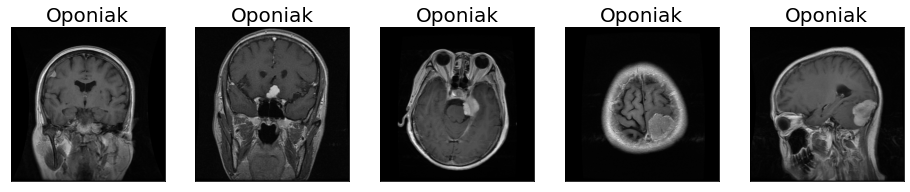

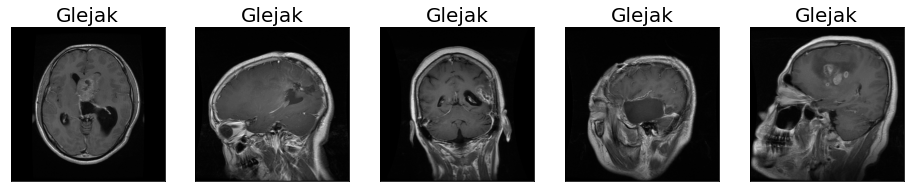

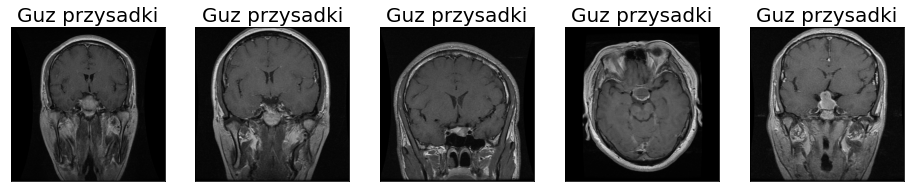

In [7]:
import random

random.shuffle(type_1)
random.shuffle(type_2)
random.shuffle(type_3)

plot_images(5, 1, type_1)
plot_images(5, 1, type_2)
plot_images(5, 1, type_3)

In [8]:
def plot_data_dist(type_1, type_2, type_3):
    df = pd.DataFrame(data={'Zestawy danych': [len(type_1), len(type_2), len(type_3)]}, index=[cancer_type[1], cancer_type[2], cancer_type[3]])
    df.plot(kind='bar', rot=0, legend=None)
    plt.title("Ilość zestawów danych ze wględu na rodzaj guza")
    plt.show()

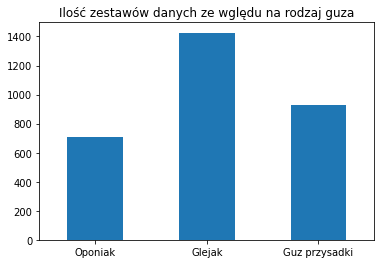

In [9]:
plot_data_dist(type_1, type_2, type_3)

In [3]:
import matplotlib.image as mpimg

In [4]:
for i, img in enumerate(type_1):
    mpimg.imsave(f'data/extracted/1/{i}.jpg', img[0].T, cmap='gray')

for i, img in enumerate(type_2):
    mpimg.imsave(f'data/extracted/2/{i}.jpg', img[0].T, cmap='gray')

for i, img in enumerate(type_3):
    mpimg.imsave(f'data/extracted/3/{i}.jpg', img[0].T, cmap='gray')

NameError: name 'type_1' is not defined

### Preprocessing
Ze względu na duży rozmiar obrazów oraz nierówny rozkład klas nowotworu (zob. wykres) zostaną wykonanne następujące kroki:
- Kompresja oraz przycięcie obrazów do rozmiaru 256 $\times$ 256.
- Uzupełnienie brakujących klas nowotwórów przez wzorst danych.

In [3]:
from os import walk

_, _, type_1_filenames = next(walk('data/extracted/1/'))
_, _, type_2_filenames = next(walk('data/extracted/2/'))
_, _, type_3_filenames = next(walk('data/extracted/3/'))

In [143]:
from PIL import Image

dim = 100
# dim = 50
# dim = 224

def read_brains(data, source, filenames, t):
    for filename in filenames:
        image = Image.open(f'data/{source}/{t}/{filename}').convert('L')
        image = image.crop((25, 25, 475, 475))
        # image = image.resize((dim, dim))
        img = np.array(image)
        # print(img.shape)
        # img = mpimg.imread(f'data/extracted/{t}/{filename}')
        data.append((img, t))

In [144]:
brains_data = []

read_brains(brains_data, 'extracted', type_1_filenames, 1)
read_brains(brains_data, 'extracted', type_2_filenames, 2)
read_brains(brains_data, 'extracted', type_3_filenames, 3)

0, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(450, 450)
(4

In [6]:
# _, _, additional_type_1_filenames = next(walk('data/training/1/'))
# _, _, additional_type_2_filenames = next(walk('data/training/2/'))
# _, _, additional_type_3_filenames = next(walk('data/training/3/'))

# read_brains('training', additional_type_1_filenames, 1)
# read_brains('training', additional_type_2_filenames, 2)
# read_brains('training', additional_type_3_filenames, 3)

In [157]:
brains = pd.DataFrame(data=brains_data, columns=['image', 'tumor_class'])
print(brains.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image        3064 non-null   object
 1   tumor_class  3064 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.0+ KB
None


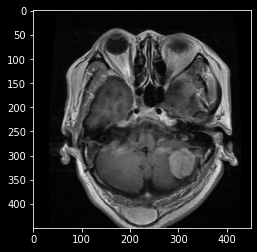

In [158]:
plt.imshow(brains['image'][0], cmap='gray')

[   0  708 1426  930]


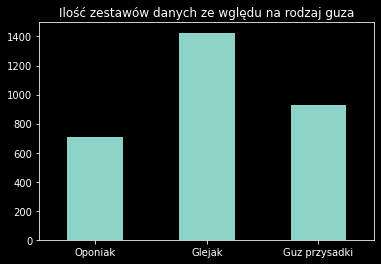

In [159]:
def plot_data_dist2(type_1, type_2, type_3):
    df = pd.DataFrame(data={'Zestawy danych': [type_1, type_2, type_3]}, index=[cancer_type[1], cancer_type[2], cancer_type[3]])
    df.plot(kind='bar', rot=0, legend=None)
    plt.title("Ilość zestawów danych ze wględu na rodzaj guza")
    plt.show()

counts = np.bincount(brains['tumor_class'].values)
print(counts)
plot_data_dist2(counts[1], counts[2], counts[3])

In [154]:
samples = 200

t1 = brains['tumor_class'] == 1
t2 = brains['tumor_class'] == 2
t3 = brains['tumor_class'] == 3
t1 = brains.loc[t1].sample(samples)
t2 = brains.loc[t2].sample(samples)
t3 = brains.loc[t3].sample(samples)

brains = t1.append([t2, t3])

KeyError: 'tumor_class'

[   0  708 1426  930]


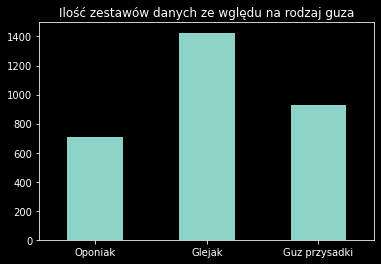

In [160]:
counts = np.bincount(brains['tumor_class'].values)
print(counts)
plot_data_dist2(counts[1], counts[2], counts[3])

### Dodanie etykiet

In [161]:
X = brains.drop(['tumor_class'], axis=1)
y = brains['tumor_class'].values

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (3064, 1) y.shape: (3064,)


### Pipeline

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

In [18]:
# class DataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attribute_names):
#         self.attribute_names = attribute_names
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[self.attribute_names]

In [19]:
# class Compresser(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X

In [20]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# class Augmenter(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
        
#         imgs = np.array(X['image'].tolist())
#         # print(np.array(X).shape)
#         # x = np.expand_dims(img, 0)
#         # x = np.expand_dims(x, 0)
#         # x.shape
#         y = np.asarray([1])

#         datagen = ImageDataGenerator(
#             width_shift_range=0.1,  # przesunięcie wzdłuż osi x
#             height_shift_range=0.1, # przesunięcie wzdłuż osi y
#             rotation_range=20,      # rotacja
#             horizontal_flip=True,   # odwrócenie poziome
#             vertical_flip = True,   # odwrócenie pionowe
#             rescale=1./255,         # parametr niezbędny, aby dobrze zwizualizować dane
#             shear_range=0.05,       # przycinanie obrazu
#             zoom_range=0.05,        # zoom
#         )

#         # # figure = plt.figure()
#         # i = 0
#         # for x_batch, y_batch in datagen.flow(x, y):
#         #     # a = figure.add_subplot(5, 5, i + 1)
#         #     new_img = np.squeeze(x_batch);
#         #     # plt.imshow(new_img)
#         #     yield new_img
#         #     # a.axis('off')
#         #     if i == 1: break
#         #     i += 1
#         # figure.set_size_inches(np.array(figure.get_size_inches()) * 3)
#         # plt.show()

#         return X

In [14]:
# dim = 256
# dim = 128

from skimage.transform import resize

class Flattener(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        arr = np.array([resize(x, (dim, dim)) for x in X['image'].values])
        return arr.reshape((-1, dim * dim))

In [22]:

# class Reshaper(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         X = np.array([resize(x, (512, 512)) for x in X['image'].values])
#         return X

In [23]:
from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[
        # ("augment_images", Augmenter()),
        ("flatten_image", Flattener()),
    ])

In [24]:
preprocess_pipeline.fit_transform(X[:1]).shape

(1, 2500)

## Proces modelowania

In [15]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from scipy.stats.distributions import uniform, randint

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
# X_train =  np.expand_dims(X_train, axis=1)
print("X.shape: {} y.shape: {}".format(X_train.shape, y_train.shape))

X.shape: (2451, 1) y.shape: (2451,)


In [271]:
seed=123
# kfold = StratifiedKFold(n_splits=5, shuffle=False, random_state=seed)
kfold = StratifiedKFold(n_splits=5, shuffle=False)

#### SVC linear

In [272]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel='linear', probability=True))])


param_grid = {
            # 'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
            'classifier__C': [0.01]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, error_score='raise')
# grid_1 = GridSearchCV(pipe, param_grid, cv=kfold)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 0.01}

In [273]:
#### SVM rbf

In [274]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel='rbf', probability=True))])


param_grid = {
            # 'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
            'classifier__C': [0.01, 0.1, 1]
}

param_distributions = {
    # 'max_depth': randint(3, 11),
    # 'learning_rate': uniform(0.001, 0.1-0.001),
    # 'n_estimators': randint(50, 400),
    'classifier__gamma': uniform(0,2),
    # 'colsample_bytree': uniform(0.5, 0.5),
    # 'subsample': uniform(0.5, 0.5),
    # 'min_child_weight': randint(1, 11)
    'classifier__C': uniform(0.001, 100)
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold, error_score='raise')
# grid_2 = RandomizedSearchCV(n_iter=5, estimator=pipe, cv=kfold, param_distributions=param_distributions, return_train_score=True, error_score='raise')

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 1}

#### SVM poly

In [275]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel='poly', probability=True))])


param_grid = {
            # 'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
            'classifier__C': [0.01, 0.1, 1]
}

param_distributions = {
    # 'max_depth': randint(3, 11),
    # 'learning_rate': uniform(0.001, 0.1-0.001),
    # 'n_estimators': randint(50, 400),
    'classifier__gamma': uniform(0,2),
    # 'colsample_bytree': uniform(0.5, 0.5),
    # 'subsample': uniform(0.5, 0.5),
    # 'min_child_weight': randint(1, 11)
    'classifier__C': uniform(0.001, 100)
}

grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, error_score='raise')
# grid_3 = RandomizedSearchCV(n_iter=5, estimator=pipe, cv=kfold, param_distributions=param_distributions, return_train_score=True, error_score='raise')

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__C': 0.1}

#### Logistic Regression

In [276]:
from sklearn import linear_model

pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', linear_model.LogisticRegression())])


param_grid = {
            # 'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
            'classifier__C': [0.01, 0.1, 1]
}

param_distributions = {
    # 'max_depth': randint(3, 11),
    # 'learning_rate': uniform(0.001, 0.1-0.001),
    # 'n_estimators': randint(50, 400),
    'classifier__gamma': uniform(0,2),
    # 'colsample_bytree': uniform(0.5, 0.5),
    # 'subsample': uniform(0.5, 0.5),
    # 'min_child_weight': randint(1, 11)
    'classifier__C': uniform(0.001, 100)
}

grid_4 = GridSearchCV(pipe, param_grid, cv=kfold, error_score='raise')
# grid_4 = RandomizedSearchCV(n_iter=5, estimator=pipe, cv=kfold, param_distributions=param_distributions, return_train_score=True, error_score='raise')

grid_4.fit(X_train, y_train)
grid_4.best_params_

arn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hubert\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'classifier__C': 0.1}

#### Decision Tree
#### Random Forest
#### AdaBoost
#### GradientBoosting

#### Keras

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import History

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from keras.callbacks import History
# from tensorflow import keras
# from tensorflow.keras import layers

In [23]:
history = History()

def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(dim, dim)))
    model.add(Dense(200,activation="relu"))
    model.add(Dense(100,activation="relu"))
    model.add(Dense(50,activation="relu"))
    model.add(Dense(10,activation="relu"))
    model.add(Dense(3,activation="softmax"))
    # model.summary()
    return model


In [164]:
xx_train = np.array([resize(x, (dim, dim)) for x in X_train['image'].values])
xx_test = np.array([resize(x, (dim, dim)) for x in X_test['image'].values])

In [165]:
from keras.utils import np_utils

yy_train = np_utils.to_categorical(y_train)
yy_test = np_utils.to_categorical(y_test)
# print(y_train2)

In [30]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2500)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               500200    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 525,893
Trainable params: 525,893
Non-trainable params: 0
__________________________________________________

In [82]:
# x = np.asarray(X_train).astype('float32')
# y = np.asarray(y_train).astype('float32')
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["categorical_accuracy"])
history = model.fit(xx_train, yy_train, validation_data=(xx_test, yy_test), batch_size=32, epochs=100)
# X_train.head()
# pipe.fit(X_train, y_train)

.0650e-04 - categorical_accuracy: 1.0000 - val_loss: 1.4663 - val_categorical_accuracy: 0.7619
Epoch 84/100
17/17 [==============================] - 0s 13ms/step - loss: 4.9625e-04 - categorical_accuracy: 1.0000 - val_loss: 1.4746 - val_categorical_accuracy: 0.7662
Epoch 85/100
17/17 [==============================] - 0s 10ms/step - loss: 4.6139e-04 - categorical_accuracy: 1.0000 - val_loss: 1.4855 - val_categorical_accuracy: 0.7576
Epoch 86/100
17/17 [==============================] - 0s 11ms/step - loss: 4.5993e-04 - categorical_accuracy: 1.0000 - val_loss: 1.4902 - val_categorical_accuracy: 0.7662
Epoch 87/100
17/17 [==============================] - 0s 10ms/step - loss: 4.1796e-04 - categorical_accuracy: 1.0000 - val_loss: 1.4995 - val_categorical_accuracy: 0.7532
Epoch 88/100
17/17 [==============================] - 0s 11ms/step - loss: 4.1061e-04 - categorical_accuracy: 1.0000 - val_loss: 1.5074 - val_categorical_accuracy: 0.7619
Epoch 89/100
17/17 [==============================

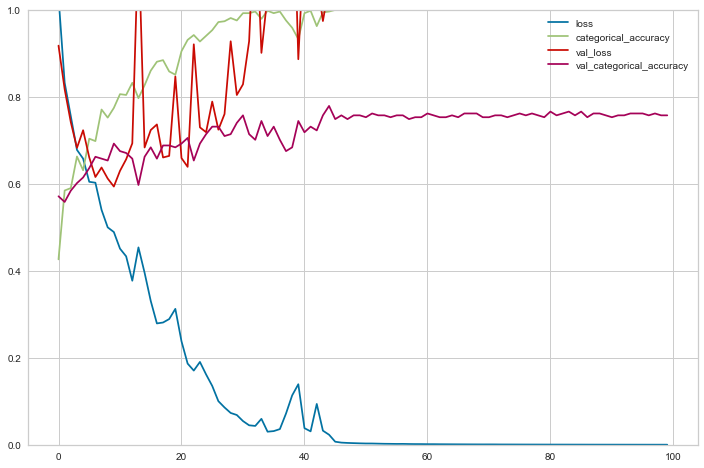

In [83]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### Sieć konwolucyjna

In [166]:

# xxX_train = np.array([x.reshape((dim, dim, 1)) for x in X_train['image'].values])
xxX_train = np.array([x.reshape((dim, dim, 1)) for x in xx_train])
xxX_test = np.array([x.reshape((dim, dim, 1)) for x in xx_test])
print(xxX_train.shape)
# X_train

(2451, 100, 100, 1)


In [168]:
# from keras.preprocessing import image
# from keras.applications.resnet50 import ResNet50
# from keras.applications.resnet50 import preprocess_input
# from keras.applications.imagenet_utils import decode_predictions

def create_conv_model():
    model = Sequential()

    
    model.add(Conv2D(32, (3, 3), input_shape=(dim, dim, 1)))
    model.add(Activation("elu"))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation("elu"))
    model.add(MaxPooling2D((3, 3)))
    model.add(Activation("elu"))
    # model.add(BatchNormalization())
    # model.add(Activation("relu"))
    # model.add(MaxPooling2D((16,16)))
    # model.add(Dropout(0.2))

    # model.add(BatchNormalization())
    # # model.add(Activation("relu"))
    # # model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3)))
    # model.add(Activation("elu"))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation("elu"))
    model.add(MaxPooling2D((3, 3)))
    model.add(Activation("elu"))

    model.add(UpSampling2D())
    model.add(Conv2D(6, (3, 3)))
    model.add(Conv2D(6, (3, 3)))
    model.add(Activation("elu"))

    model.add(UpSampling2D())
    model.add(Activation("elu"))
    model.add(Conv2D(64, (3, 3)))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation("elu"))


    # model.add(Flatten(input_shape=(dim, dim)))
    model.add(Flatten())
    model.add(Dense(128, activation="elu"))
    model.add(Dense(128, activation="elu"))
    # model.add(Dense(256,activation="relu"))
    # model.add(Dense(128,activation="relu"))
    # model.add(Dense(64,activation="relu"))
    # # model.add(Dense(32,activation="relu"))
    # model.add(Dense(16,activation="relu"))
    model.add(Dense(3, activation="softmax"))
    return model

In [169]:
history = History()
model = create_conv_model()
model.summary()

)        9248      
_________________________________________________________________
activation_45 (Activation)   (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
activation_46 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
activation_47 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 9, 9, 64)          0         
________________________________________________________

In [170]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["categorical_accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
history = model.fit(xxX_train, yy_train, validation_data=(xxX_test, yy_test), batch_size=32, epochs=100, callbacks=[early_stopping])

=======================] - 106s 1s/step - loss: 0.4088 - categorical_accuracy: 0.8258 - val_loss: 0.3720 - val_categorical_accuracy: 0.8564
Epoch 5/100
77/77 [==============================] - 107s 1s/step - loss: 0.3005 - categorical_accuracy: 0.8703 - val_loss: 0.4331 - val_categorical_accuracy: 0.8075
Epoch 6/100
77/77 [==============================] - 108s 1s/step - loss: 0.2368 - categorical_accuracy: 0.8976 - val_loss: 0.2927 - val_categorical_accuracy: 0.8760
Epoch 7/100
77/77 [==============================] - 109s 1s/step - loss: 0.1679 - categorical_accuracy: 0.9298 - val_loss: 0.3186 - val_categorical_accuracy: 0.8728
Epoch 8/100
77/77 [==============================] - 110s 1s/step - loss: 0.1937 - categorical_accuracy: 0.9233 - val_loss: 0.3397 - val_categorical_accuracy: 0.8777
Epoch 9/100
77/77 [==============================] - 107s 1s/step - loss: 0.1100 - categorical_accuracy: 0.9535 - val_loss: 0.2172 - val_categorical_accuracy: 0.9217
Epoch 10/100
77/77 [==========

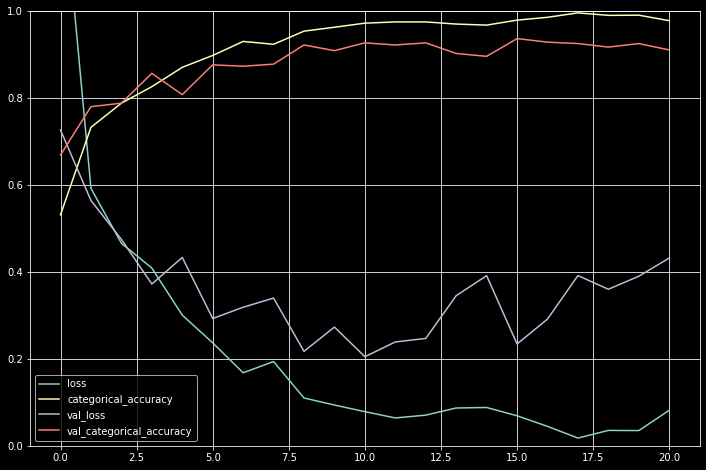

In [171]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [53]:
# from sklearn.metrics import roc_curve
# y_pred_keras = model.predict(xxX_test).ravel()
# fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

## Porównanie modeli

In [172]:
from sklearn import  metrics

models = []
# models.append(('svm_linear', grid_1.best_estimator_))
# models.append(('svm_rbf', grid_2.best_estimator_))
# models.append(('svm_poly', grid_3.best_estimator_))
# models.append(('log_reg', grid_4.best_estimator_))
models.append(('neural_net', model))

In [278]:
_, _, test_type_1_filenames = next(walk('data/testing/1/'))
_, _, test_type_2_filenames = next(walk('data/testing/2/'))
_, _, test_type_3_filenames = next(walk('data/testing/3/'))

X_test = []

read_brains(X_test, 'testing', test_type_1_filenames, 1)
read_brains(X_test, 'testing', test_type_2_filenames, 2)
read_brains(X_test, 'testing', test_type_3_filenames, 3)

b = pd.DataFrame(data=X_test, columns=['image', 'tumor_class'])
X_test = b.drop(['tumor_class'], axis=1)
y_test = b['tumor_class'].values

y_test = label_encoder.fit_transform(y_test)

print("X.shape: {} y.shape: {}".format(X.shape, y.shape))
# X_test.head()

X.shape: (768, 1) y.shape: (768,)


In [62]:
predictions = {}

for name, model in models:
    predictions[name] = model.predict(xxX_test)

In [280]:
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    precision_score.append(metrics.precision_score(y_test, predictions[name], average='macro'))
    recall_score.append(metrics.recall_score(y_test, predictions[name], average='macro'))
    f1_score.append( metrics.f1_score(y_test, predictions[name], average='macro'))
    accuracy_score.append(metrics.accuracy_score(y_test, predictions[name]))

In [71]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model):
    visualizer = ROCAUC(model, encoder={0: cancer_type[1], 
                                        1: cancer_type[2], 
                                        2: cancer_type[3]})
                                        
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    return visualizer

for _, model in models:
    plot_ROC_curve(model)

YellowbrickTypeError: This estimator is not a classifier; try a regression or clustering score visualizer instead!

In [282]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
# df.insert(loc=0, column='Method', value=['SVM linear'])
# df.insert(loc=0, column='Method', value=['SVM linear', 'SVM rbf'])
# df.insert(loc=0, column='Method', value=['SVM linear', 'SVM rbf', 'SVM poly'])
df.insert(loc=0, column='Method', value=['SVM linear', 'SVM rbf', 'SVM poly', 'log reg'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,SVM linear,0.327405,0.273850,0.217396,0.235294
1,SVM rbf,0.473116,0.334132,0.313361,0.332180
2,SVM poly,0.249498,0.266780,0.246899,0.256055
3,log reg,0.309898,0.247622,0.226357,0.224913


## Wizualizacja wyników

In [42]:
from sklearn import metrics

for name, model in models:
    print(f"Classification report for classifier {name}:\n"
        f"{metrics.classification_report(y_test, predictions[name])}\n")

    disp = metrics.plot_confusion_matrix(model, X_test, y_test)
    disp.figure_.suptitle("Confusion Matrix")
    print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

## Podsumowanie pracy

In [284]:
import joblib

for name, model in models:
    joblib.dump(model, f'{name}.model')

In [47]:
from PIL import Image
name, model = models[0]
# model = joblib.load('svm_linear.model')


# image = Image.open('image20.jpg').convert('L')
image = Image.open(f'data/extracted/3/1.jpg').convert('L')
img = np.array(image)
# img = X_test['image'][0]
# print(y_test[0])
print(img)

df = pd.DataFrame(data={'image': []})
df.loc[0] = [img]
df
print(model.predict(X_test.head()))
# print(model.predict(df)[0])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [286]:
predictions['svm_linear']

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 0], dtype=int64)

In [63]:
t = predictions['neural_net']

import torch

a = torch.FloatTensor(t)

b = torch.argmax(a, dim=1)
print(b.detach())


tensor([1, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2,
        2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1,
        2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1,
        1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1,
        2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2,
        1, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2,
        1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1,
        2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2,
        0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2,
        0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1,
        2, 2, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0,
        2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0,

In [173]:
model.save("conv.model")

INFO:tensorflow:Assets written to: conv.model\assets
